In [1]:
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import random as tf_random
import numpy as np
import random

# data processing
import pandas as pd

#importing mnist
from keras.datasets import mnist



In [2]:
#Getting trainting and test sets
mnist1 = mnist.load_data()

In [3]:

#train test split
(X_train1, y_train1), (X_test1, y_test1) = mnist1

In [4]:
print('X_train: ' + str(X_train1.shape))
print('Y_train: ' + str(y_train1.shape))
print('X_test:  '  + str(X_test1.shape))
print('Y_test:  '  + str(y_test1.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
#checking for dummies
y_train = pd.get_dummies(y_train1).values
y_test = pd.get_dummies(y_test1).values

#Printing
print('X_train: ' + str(X_train1.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test1.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000, 10)
X_test:  (10000, 28, 28)
Y_test:  (10000, 10)


In [19]:
def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

In [22]:
# prepare the mlp model
mlp1 = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(10, activation='softmax')
    ])

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# fit and validate the model
mlp1.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=10, shuffle=True);

##Acc

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 9.7141 - accuracy: 0.8396 - val_loss: 6.4153 - val_accuracy: 0.8791
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0722 - accuracy: 0.8781 - val_loss: 5.6866 - val_accuracy: 0.8922
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7303 - accuracy: 0.8825 - val_loss: 5.7378 - val_accuracy: 0.8897
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4881 - accuracy: 0.8851 - val_loss: 6.4585 - val_accuracy: 0.8689
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4477 - accuracy: 0.8858 - val_loss: 5.9872 - val_accuracy: 0.8795
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2341 - accuracy: 0.8890 - val_loss: 7.2150 - val_accuracy: 0.8599
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1646 - accuracy: 0.8878 - val_loss: 5.7611 - val_accuracy:

In [10]:
# initialize seeds
init_seeds(314)

# prepare the CNN model

cnn = Sequential(
    [
        Conv2D(filters=32, 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train1, y_train, epochs=5, shuffle=True);


Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.5101 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0871 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0513 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0421 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0330 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0307 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0195 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0167 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0187 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 53s 28m

In [25]:
#Evaluate accuracy

def test_model(model, test_data, lables):
    loss, accuracy = model.evaluate(test_data, lables, batch_size=1)
    print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')
    
test_model(cnn, X_test1, y_test)
test_model(mlp1, X_test1, y_test)

#CNN accuracy (98%) is better than mlp (89%)

10000/10000 [==============================] - 33s 3ms/step - loss: 0.0946 - accuracy: 0.9843
Loss: 9.46%, Accuracy: 98.43%
10000/10000 [==============================] - 16s 2ms/step - loss: 5.6292 - accuracy: 0.8947
Loss: 562.92%, Accuracy: 89.47%


In [14]:
probs = cnn.predict(X_test1)

313/313 [==============================] - 2s 7ms/step


In [15]:
[f'{x:.5f}' for x in probs[0]]
y_preds = [np.argmax(x) for x in probs]

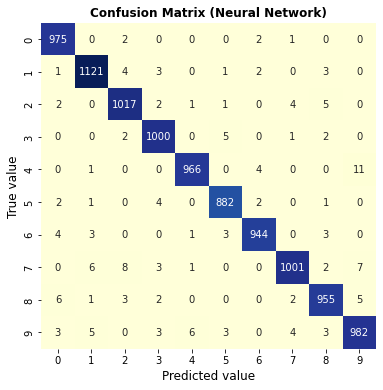

In [17]:
cfm = confusion_matrix(y_test1, y_preds)
plt.figure(figsize=(6, 6))
fmt1 = 'd'

sns.heatmap(cfm, annot=True, cbar=False, cmap='YlGnBu', fmt=fmt1)
plt.xlabel('Predicted value', fontsize=12)
plt.ylabel('True value', fontsize=12)
plt.title('Confusion Matrix (Neural Network)', fontsize=12, weight='semibold');

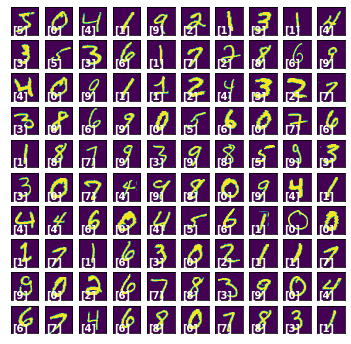

In [27]:
#Visualize


fig, axes = plt.subplots(10, 10, 
                         figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train1[i])
    
    act = [y_train1[i]]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();